### Binary Classification Function
To have a visual understanding of what's going on, let's consider now a binary classification problem, where every feature has two dimensions (a 2-D problem). Let's first define the input dataset; here the make_classifier method of the Scikit-learn library comes in very handy. It creates a dummy dataset for classification, providing the number of classes, the dimensionality of the problem, and the number of observations as parameters. Additionally, you should specify that each feature is informative (and there are no redundancies) and each class is composed of a single cluster of points:

In [1]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
from sympy import * 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


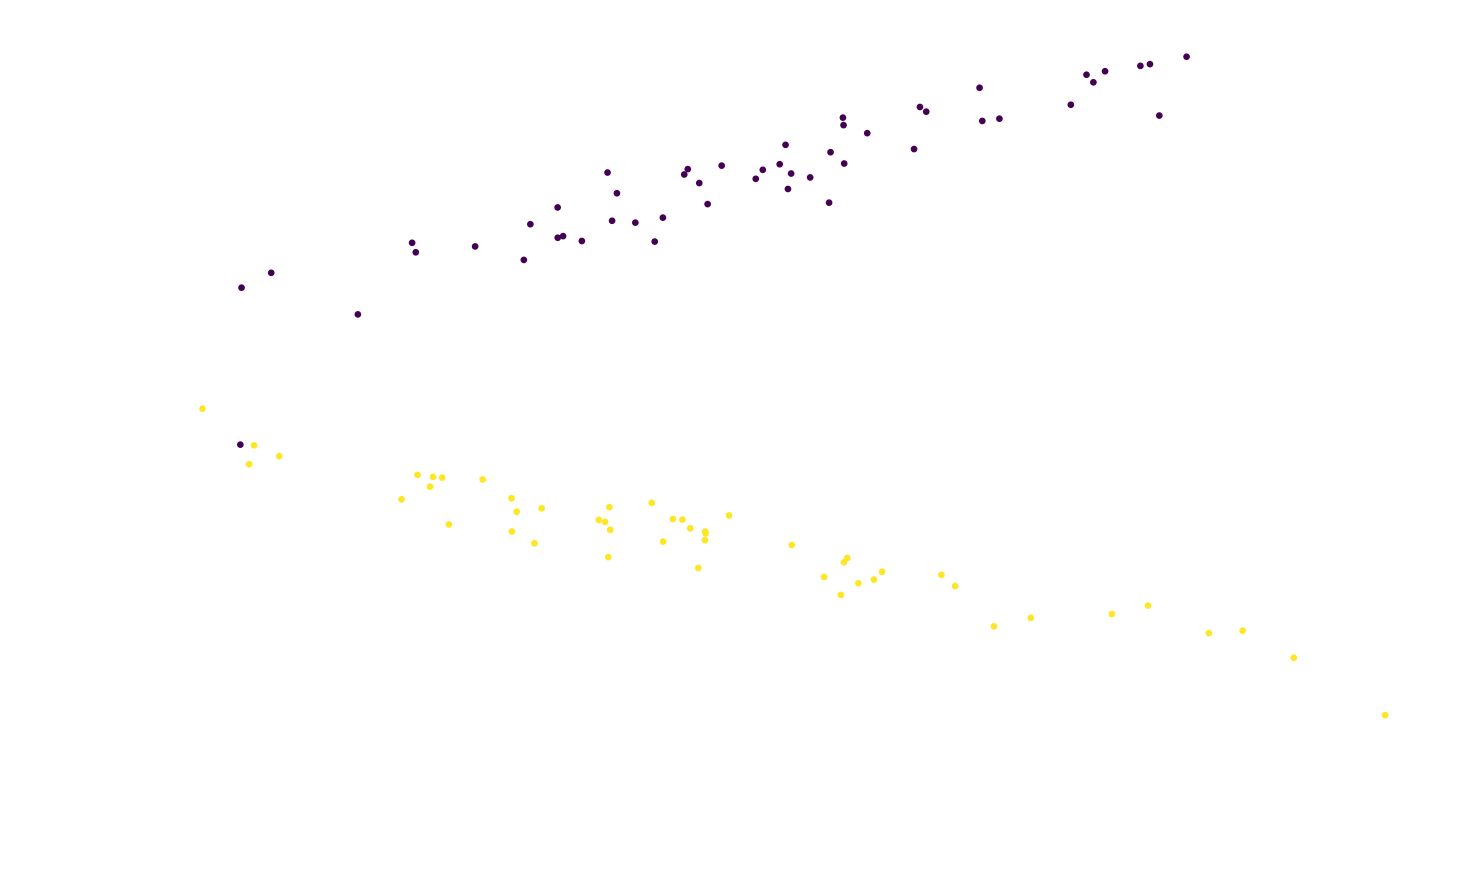

In [3]:
""" Use %matplotlib if you want to print plot as external png! """
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=1, 
                          class_sep = 2.0, random_state=101)

""" Change background color of only graph of plot """
ax = plt.axes()
ax.set_facecolor('white')

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           linewidths=0, edgecolors=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();

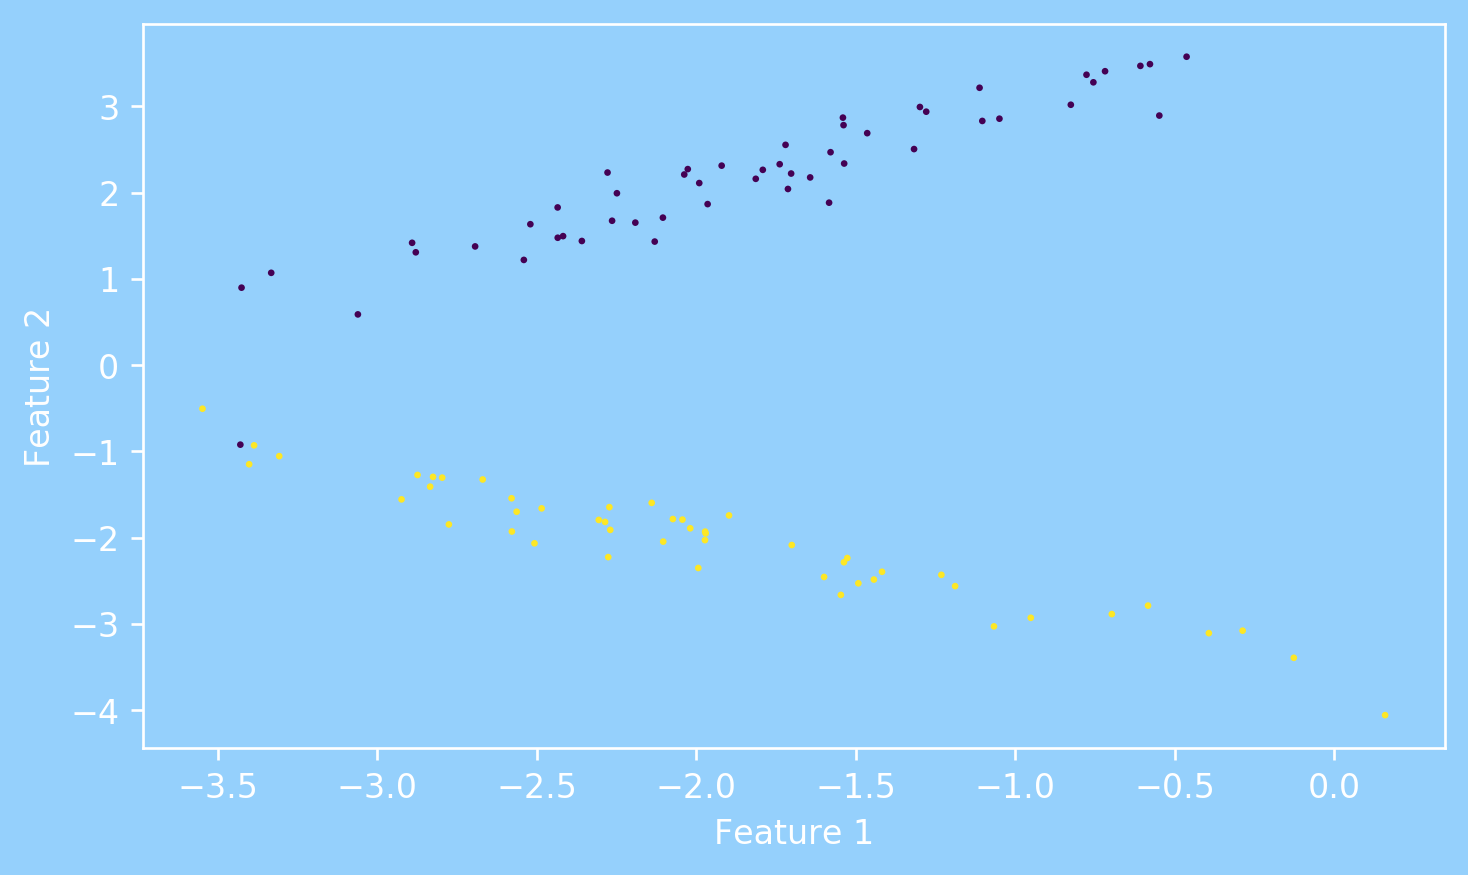

In [4]:
X, y = make_classification(n_samples=100, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=1, 
                          class_sep = 2.0, random_state=101)

""" Or Change background color of whole plot """
fig = plt.figure()
fig.patch.set_facecolor('xkcd:light blue')

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           linewidths=0, edgecolors=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();

In [5]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

In [6]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_orig, y_pred)
display(c_matrix)

array([[4, 2],
       [1, 3]], dtype=int64)

### Explanation
From this matrix we can extract some evidence:
* The number of samples is 10 (the sum of the whole matrix).
* The number of samples labeled 0 in the original is 6; 1s are 4 (the sum for the lines).
* These numbers are named support.
* The number of samples labeled 0 in the predicted dataset is 5; 1s are 5 (the sum as
columns).
* Correct classifications are 7 (the sum of the diagonal).
* Misclassifications are 3 (the sum of all numbers not on the diagonal)
#### A perfect classification example would have had all the numbers on the diagonal, and 0 elsewhere.

#### This matrix can also be represented graphically, using a heatmap. This is a very impactful representation, especially when dealing with multiclass problems:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


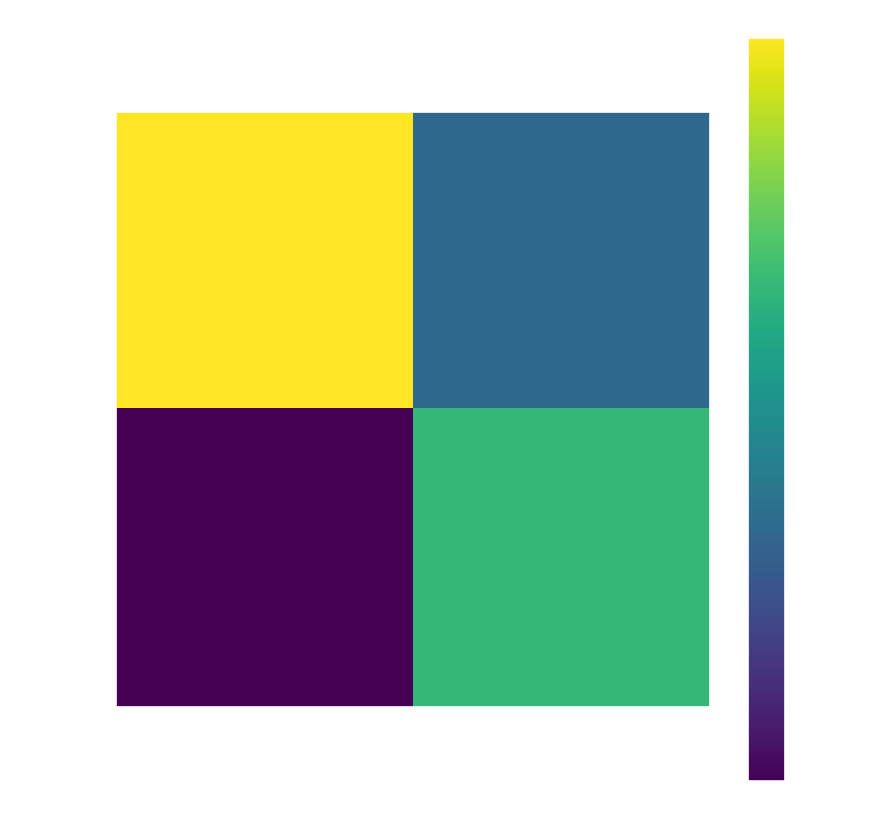

In [7]:
plt.matshow(c_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show();

In [8]:
""" Accuracy is an error measure of the confusion matrix that is percentage of 
correct classifications, over the total number of samples. """
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

In [9]:
""" Precision considers only one label and counts the percentage of correct 
classifications on that label."""
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

In [10]:
""" Recall If precision is about the quality of what you got (that is, 
the quality of the results marked with the label 1), recall is about the 
quality of what you could have gotten—that is, how many instances of 1 
you've been able to extract properly."""
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [12]:
""" The output can be either "0" or "1". What if we check the probability of 
the label belonging to class "1"? More specifically, a classification problem 
can be seen as: given the feature vector, find the class (either 0 or 1) that 
maximizes the conditional probability."""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), 
                                                    test_size=0.33, random_state=101)

In [13]:
y_test.dtype

dtype('float64')

In [14]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [15]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

### What's the σ function? Well, the answer to both questions is trivial: the standard choice of sigma is the logistic function, also named the inverse-logit function: σ(t)=logit −1 (t)= 1+e −t 1 

Although there are infinite functions that satisfy the sigmoid constraints, the logistic has been chosen because it's continuous, easily differentiable, and quick to compute. If the results are not satisfactory, always consider that, by introducing a couple of parameters, you can change the steepness and the center of the function. The sigmoid function is quickly drawn:

In [16]:
import numpy as np

def model(x):
    return 1 / (1 + np.exp(-x))

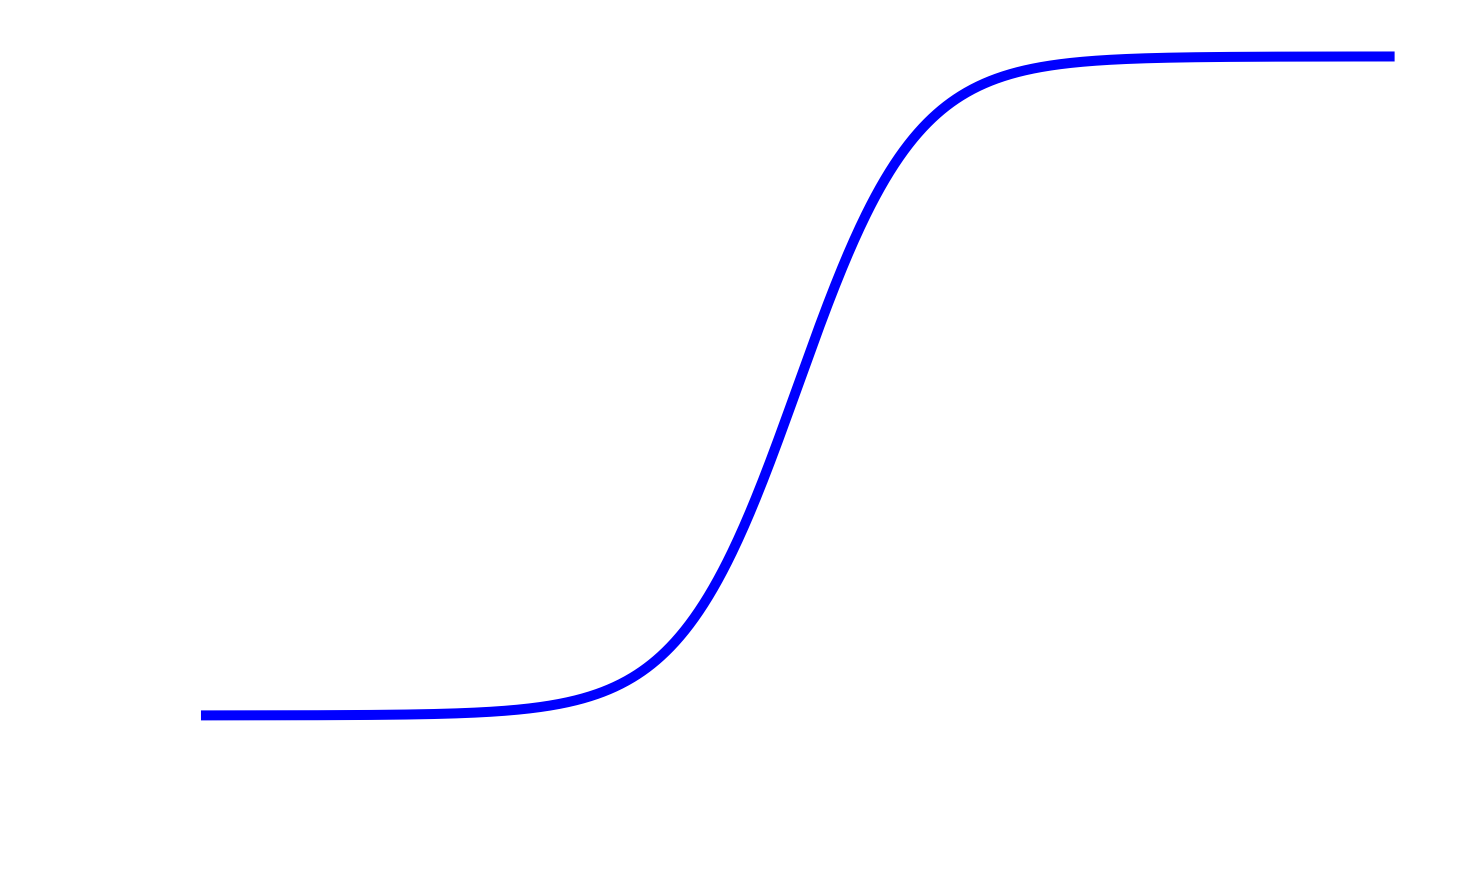

In [17]:
X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show();

### Creating and fitting a logistic regressor classifier is really easy: thanks to Scikit-learn, it just requires a couple of lines of Python code. As for regressors, to train the model you need to call the fit method, whereas for predicting the class you just need to call the predict method:

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



### Let's see how you can visually see the decision boundary here:

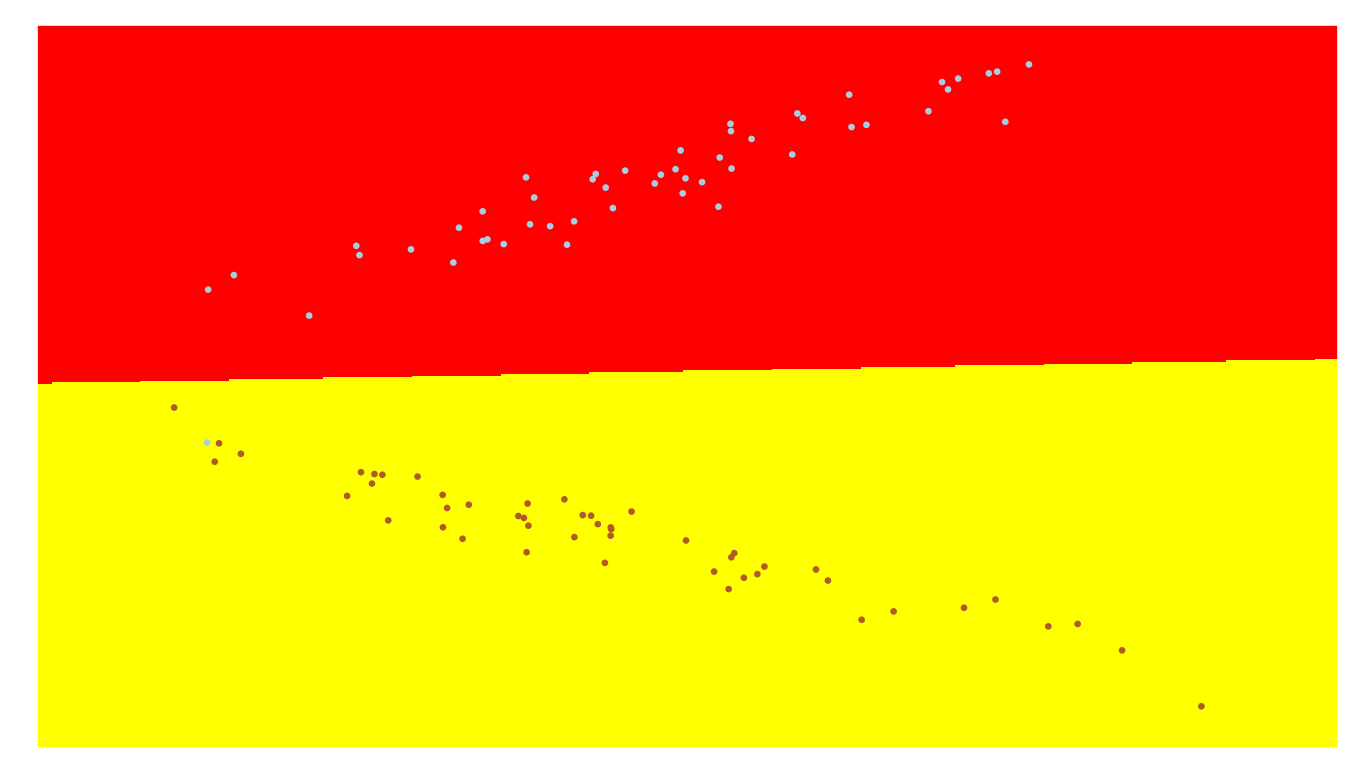

In [19]:
# Example based on:
# Code source: Gaël Varoquaux, Modified for documentation by Jaques Grobler, License: BSD 3 clause

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

C:\Users\vreed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


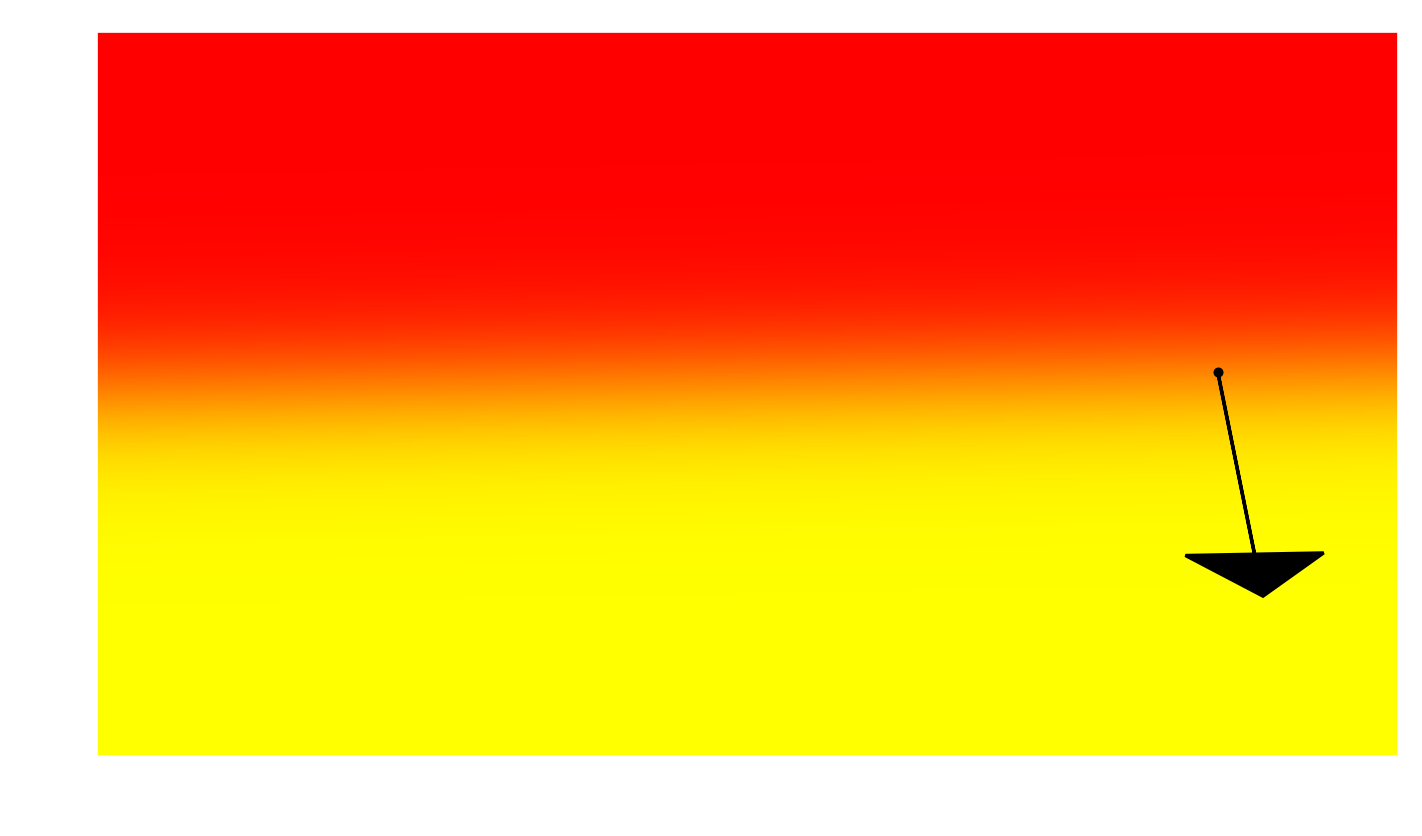

In [20]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, 
head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Logistic regression is a very popular algorithm because of the following:It's linear: it's the equivalent of the linear regression for classification.It's very simple to understand, and the output can be the most likely class, or the probability of membership.It's simple to train: it has very few coefficients (one coefficient for each feature, plus one bias). This makes the model very small to store (you just need to store a vector of weights).It's computationally efficient: using some special tricks (see later in the lesson), it can be trained very quickly.It has an extension for multiclass classification.Unfortunately, it's not a perfect classifier and has some drawbacks:It's often not very performant, compared to most advanced algorithms, because it tends to underfit (no flexibility: the boundary has to be a line or a hyperplane)It's linear: if the problem is non-linear, there is no way to properly fit this classifier onto the dataset

### Our dataset is an artificially created one, composed of 10,000 observations and 10 features, all of them informative (that is, no redundant ones) and labels "0" and "1" (binary classification). Having all the informative features is not an unrealistic hypothesis in machine learning, since usually the feature selection or feature reduction operation selects non-related features.

In [21]:
X, y = make_classification(n_samples=10000, n_features=10,
                          n_informative=10, n_redundant=0,
                          random_state=101)

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [24]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.3671
Time:                        15:21:21   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

* Converged: This tells whether the classification model has reached convergence while being trained. Use the model only if this parameter is true.
* Log-Likelihood: This is the logarithm of the likelihood. It's what we previously named.
* LL-Null: This is the Log-Likelihood when only the intercept is used as a predictor.
* LLR p-value: This is the chi-squared probability of getting a log-likelihood ratio statistically greater than LLR. Basically, it shows how the model is better than guessing with a constant value. LLR is the log-likelihood ratio, that is, the logarithm of the likelihood of the null model (intercept only), divided by the likelihood of the alternate model (full model).
* Pseudo R-squared: This can be seen as the proportion of the total variability unexplained by the model. It's computed as 1-Log-likelihood/LL-Null.

### As for the coefficient table, there is one line for each coefficient: const is the weight associated to the intercept term (that is, the bias weight); x1, x2, … x10 are the weights associated to the 10 features composing the model. For each of them there are a few values:

* Coef: This is the weight in the model associated to that feature.
* Std err: This is the standard error of the coefficient, that is its (predicted) standard deviation (across all observations) divided by the square root of the sample size.
* Z: This is the ratio between the standard error and the coefficient (it's the stat t-value).
* P>|z|: This is the probability of obtaining a t-value greater than z, while sampling from the same population.
* [95.0% Conf. Int.]: This is the interval where, with 95% confidence, the real value of the coefficient is. It is computed as coefficient  /- 1.96 * std err.

### An alternate method to obtain the same result (often used when the model contains a small number of features) is to write down the formula involved in the regression. This is possible thanks to the Statsmodel formula API, which makes the fitting operation similar to what you would use in R. We first need to name the features, then we write down the formula (using the names we set), and lastly we fit the model. With this method, the intercept term is automatically added to the model. Its output, then, is the same as the preceding output:

In [25]:
import pandas as pd

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(formula = 
    'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
    VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10', data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.3671
Time:                        15:27:48   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
observations = len(X)
variables = ['VAR'+str(i+1) for i in range(10)]

In [32]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def sigmoid(X,w):
    return 1./(1.+np.exp(-np.dot(X,w)))

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def logit_loss(X,w,y):
    return sigmoid(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y,loss_type=squared_loss):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss_type(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01, loss_type=squared_loss):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y,loss_type))]

def optimize(X,y, alpha=0.01, eta = 10**-12, loss_type=squared_loss, iterations = 1000):
    standardization = StandardScaler()
    Xst = standardization.fit_transform(X)
    original_means, originanal_stds = standardization.mean_, standardization.std_
    Xst = np.column_stack((Xst,np.ones(observations)))
    w = random_w(Xst.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(Xst,w,y))
        new_w = update(Xst,w,y, alpha=alpha, loss_type=logit_loss)
        new_SSL = np.sum(squared_loss(Xst,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            break
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    unstandardized_betas = w[:-1] / originanal_stds
    unstandardized_bias = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])

    return np.insert(unstandardized_betas, 0, unstandardized_bias), 
    path,k
                                 
alpha = 0.5
w, path, iterations = optimize(X, y, alpha, eta = 10**-5, loss_type=logit_loss, iterations = 100000)
print ("These are our final standardized coefficients: %s" % w)
print ("Reached after %i iterations" % (iterations+1))

AttributeError: 'StandardScaler' object has no attribute 'std_'